In [1]:
from tensorflow.keras.layers import Input , Lambda , Dense , Flatten , Conv2D , Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_path = '/content/drive/MyDrive/monkey/training/training'
test_path = '/content/drive/MyDrive/monkey/validation/validation'

In [5]:
folders = glob('/content/drive/MyDrive/monkey/training/training/*')
print(len(folders))

10


In [6]:
def create_model(input_shape):
   
    base_model = tf.keras.applications.Xception(input_shape = input_shape,
                       include_top = False)
                      

    # we do not have to train all of the layers
    for layer in base_model.layers:
        layer.trainable = False
        
    x = tf.keras.layers.Flatten()(base_model.output)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(10, activation = 'softmax')(x)
    
    return tf.keras.models.Model(base_model.input,x)
model = create_model((150,150,3))
model.summary()

83689472/83683744 [==============================] - 1s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
______________________

In [7]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                           
                            rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True)




test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (150, 150),
                                                 batch_size = 100,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (150, 150),
                                            batch_size = 20,
                                            class_mode = 'categorical')

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [10]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
11/11 [==============================] - 340s 31s/step - loss: 12.6653 - accuracy: 0.4754 - val_loss: 2.5109 - val_accuracy: 0.7978
Epoch 2/100
11/11 [==============================] - 141s 13s/step - loss: 3.5483 - accuracy: 0.7495 - val_loss: 0.7162 - val_accuracy: 0.8971
Epoch 3/100
11/11 [==============================] - 137s 12s/step - loss: 1.2199 - accuracy: 0.7832 - val_loss: 0.5449 - val_accuracy: 0.8897
Epoch 4/100
11/11 [==============================] - 137s 12s/step - loss: 0.7019 - accuracy: 0.8069 - val_loss: 0.3854 - val_accuracy: 0.9044
Epoch 5/100
11/11 [==============================] - 137s 12s/step - loss: 0.6468 - accuracy: 0.7996 - val_loss: 0.3788 - val_accuracy: 0.9118
Epoch 6/100
11/11 [==============================] - 140s 13s/step - loss: 0.5424 - accuracy: 0.8306 - val_loss: 0.3366 - val_accuracy: 0.8934
Epoch 7/100
11/11 [==============================] - 137s 12s/ste

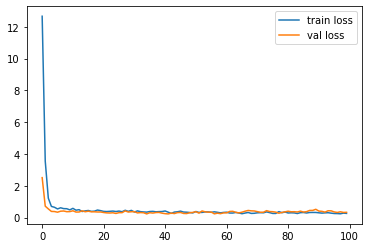

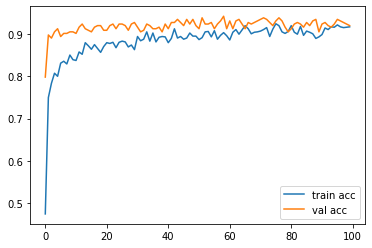

<Figure size 432x288 with 0 Axes>

In [11]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
from tensorflow.keras.models import load_model

model.save('monkey_Xception.h5')

In [13]:
!ls

AccVal_acc.png	drive  LossVal_loss.png  monkey_Xception.h5  sample_data


In [14]:
drive.flush_and_unmount()

In [15]:
!ls

AccVal_acc.png	LossVal_loss.png  monkey_Xception.h5  sample_data


In [16]:
!zip -r monkeymodel.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2020.12.02/ (stored 0%)
  adding: content/.config/logs/2020.12.02/22.04.38.150307.log (deflated 54%)
  adding: content/.config/logs/2020.12.02/22.04.13.854338.log (deflated 87%)
  adding: content/.config/logs/2020.12.02/22.04.21.823807.log (deflated 54%)
  adding: content/.config/logs/2020.12.02/22.03.37.873126.log (deflated 91%)
  adding: content/.config/logs/2020.12.02/22.04.37.441505.log (deflated 54%)
  adding: content/.config/logs/202

In [17]:
from google.colab import files
files.download('monkeymodel.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
